Matplotlib.pyplot regroupe un ensemble de fonctions de commande qui ressemblent à ce qui se trouve sur MATLAB.

Les fonctions "pyplot" servent à : Créer une figure, créer une zone de traçage dans une figure, tracer certaines lignes dans une zone de traçage, décorer le tracé avec des étiquettes, etc...

Dans matplotlib.pyplot, différents états sont préservés à travers la fonction "call", de sorte qu'il conserve la trace de choses comme la figure actuelle et la zone de traçage, et les fonctions de traçage sont dirigés vers les axes actuels.

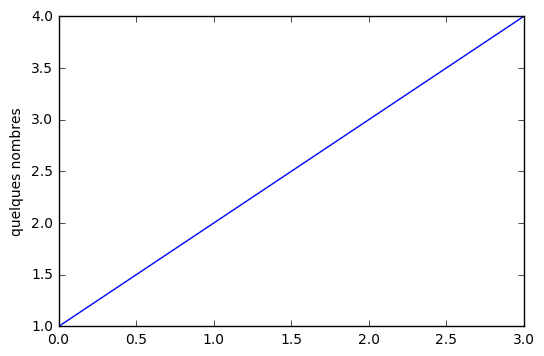

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('quelques nombres')
plt.show()

pyplot génère automatiquement les axes de la figure s'ils ne sont pas fournit manuellement

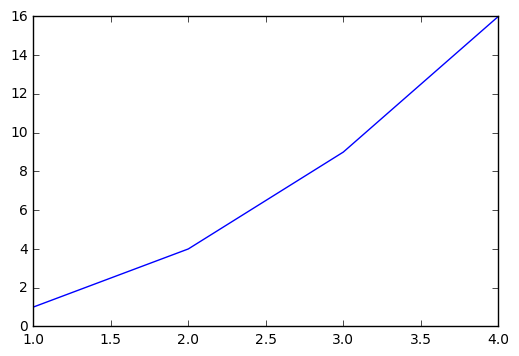

In [6]:
%matplotlib inline
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

Pour chaque x,y on peut ajouter un 3eme argument pour le choix de la couleur ou d'autres propriétés de la figure

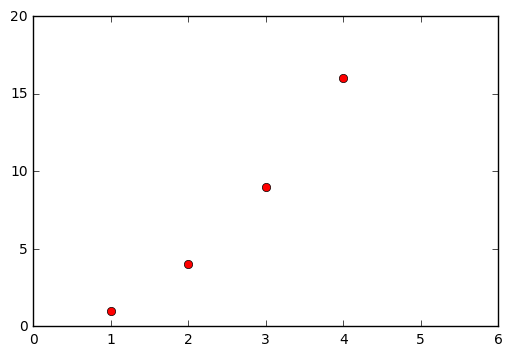

In [8]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()


Travailler seulement en listes sur matplotlib ne sert à rien pour les calculs, c'est pour cela que tout est reconverti en numpy arrays en interne

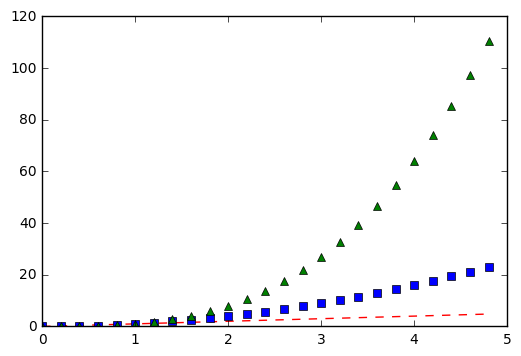

In [10]:
import numpy as np
import matplotlib.pyplot as plt


t = np.arange(0., 5., 0.2)


plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Contrôler les lignes de propriétés 

On peut modifier plusieurs propriétés, la largeur de la ligne, le style de dash. Il y a plusieurs façons de faire les modifications : 

* Utiliser les arguments de la fonction : 

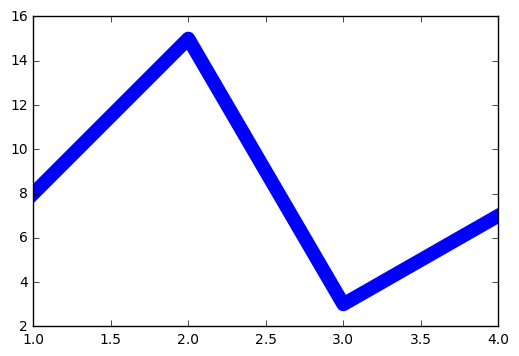

In [15]:
%matplotlib inline
plt.plot((1,2,3,4), (8,15,3,7), linewidth=10.0)

* Utiliser la méthode Line2D

In [ ]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) 

* Utiliser la commande setp(). L'exemple ci-dessous utilise une commande du style MATLAB afin de fixer plusieurs propriétés d'une ligne :

In [ ]:
lines = plt.plot(x1, y1, x2, y2)

plt.setp(lines, color='r', linewidth=2.0)

plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

Pour avoir une liste de propriétés modifiables, on utilise la commande setp() avec une, ou plusieurs lignes en tant qu'argument

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

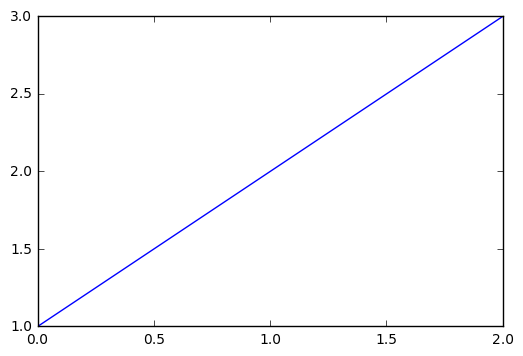

In [25]:
lines = plt.plot([1, 2, 3])

plt.setp(lines)

## Figures et axes multiples

MATLAB et pyplot se basent sur le concept de la figure et axe actuels. Toutes les commandes de traçage s'appliquent aux axes actuels. Il y a des fonctions pour selectionner les figures et axes actuels, mais ils ne faut pas s'ne inquiéter vu que tout est géré automatiquement : 

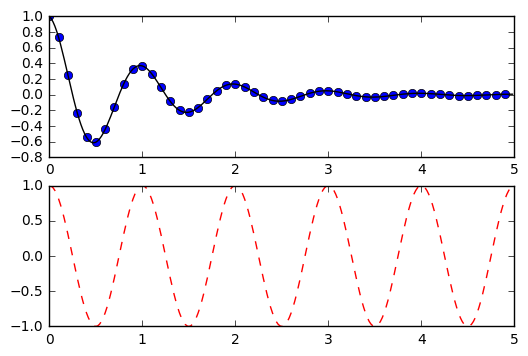

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

La commande 'figure()' est ici optionnelle car la figure(1) sera comme subplot(111), créées par défaut si on ne spécifie pas manuellement les axes.

La commande subplot() spécifie 'numrows, numcols et fignum où fignum va de 1 à numrows*numcols. 

Les virgules dans la commande subplot sont optionnelles si numrows*numcols < 10.
*
subplot(211) est donc identique à subplot( 2, 1, 1 ). On peut créer un nombre arbitraire de subplots et d'axes.

Si vous voulez placer un axe manuellement, c'est-à-dire pas sur une grille rectangulaire, utilisez la commande axes(), qui permet de spécifier l'emplacement en tant qu'axes ([left, bottom, width, height]) où toutes les valeurs sont fractionnaires (0 à 1). 

Vous pouvez créer plusieurs figures en utilisant plusieurs chiffres () avec un numéro de chiffres croissant. Bien sûr, chaque figure peut contenir autant d'axes et de sous-traits souhaités :

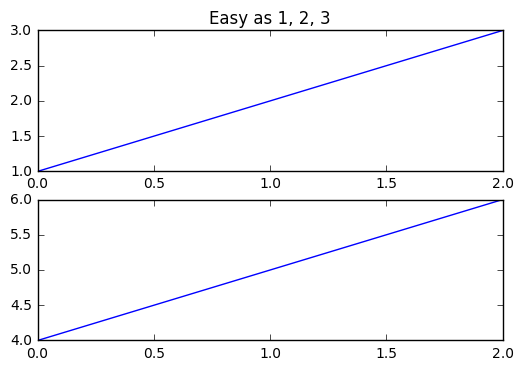

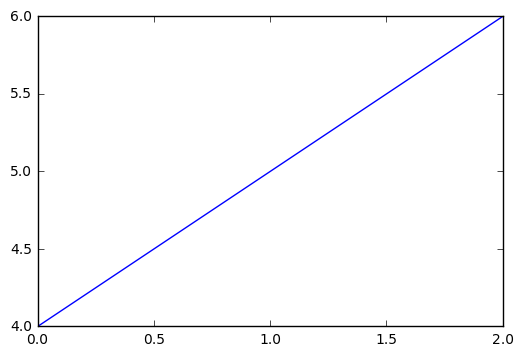

In [28]:
import matplotlib.pyplot as plt
plt.figure(1)                
plt.subplot(211)             
plt.plot([1, 2, 3])
plt.subplot(212)             
plt.plot([4, 5, 6])


plt.figure(2)                
plt.plot([4, 5, 6])          

plt.figure(1)                
plt.subplot(211)             
plt.title('Easy as 1, 2, 3') 

On peut effacer la figure actuelle avec clf() et les axes courants avec cla().

La mémoire requise pour une figure n'est pas complètement libérée jusqu'à ce que la figure soit explicitement fermée avec close(). Supprimer toutes les références à la figure et / ou utiliser le gestionnaire de fenêtres pour terminer la fenêtre dans laquelle la figure apparaît à l'écran, ne suffit pas, parce que pyplot maintient des références internes jusqu'à ce que close() soit appelé.

## Le texte

La commande text () peut être utilisée pour ajouter du texte dans un emplacement arbitraire, et xlabel (), ylabel () et title () sont utilisés pour ajouter du texte dans les emplacements indiqués.

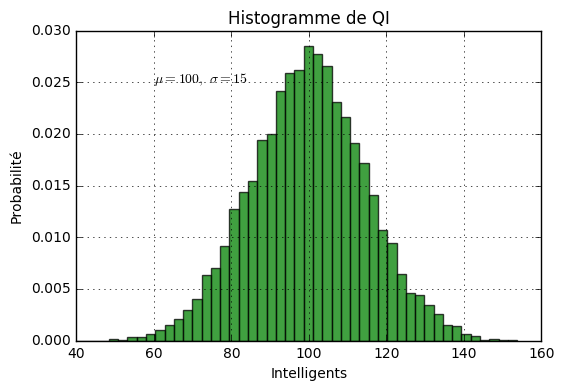

In [30]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)


n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Intelligents')
plt.ylabel('Probabilité')
plt.title('Histogramme de QI')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Toutes les commandes text() renvoient une occurrence matplotlib.text.Text. Tout comme avec les lignes ci-dessus, vous pouvez personnaliser les propriétés en passant des arguments de mots clés dans les fonctions de texte ou en utilisant setp()

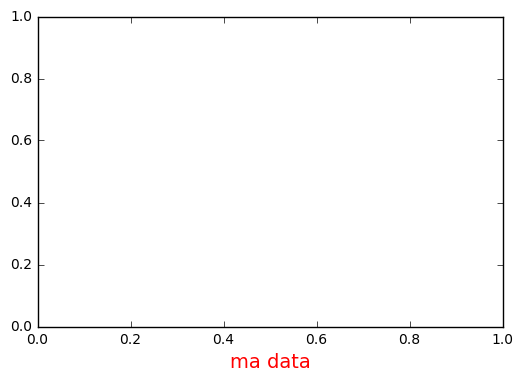

In [32]:
t = plt.xlabel('ma data', fontsize=14, color='red')

## Les expressions mathématiques dans le texte

Matplotlib accepte les expressions d'équation TeX dans n'importe quelle expression de texte.

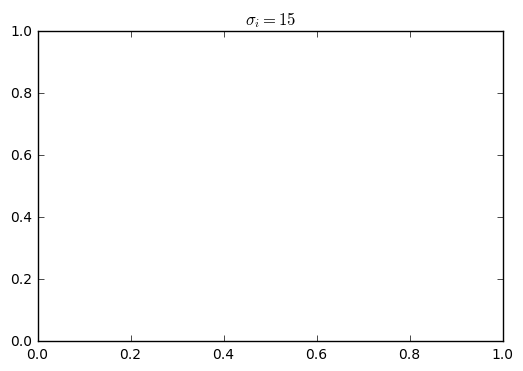

In [34]:
plt.title(r'$\sigma_i=15$')

Le r précédant la chaîne de titre est important - il signifie que la chaîne est une chaîne brute et qu'il ne faudra pas traiter les backslashes comme les échappement python. Matplotlib dispose d'un analyseur d'expression TeX intégré et d'un moteur de mise en page, et envoie ses propres polices mathématiques.

## Les annotations

La commande *text()* place le texte à une position arbitraire sur les axes. Une utilisation courante pour le texte est d'annoter une caractéristique du tracé, et la méthode *annotate()* fournit une fonctionnalité d'assistance pour faciliter les annotations. Dans une annotation, il ya deux points à considérer: l'emplacement étant annoté représenté par l'argument xy et l'emplacement du texte xytext. Ces deux arguments sont (x, y) tuples.

(-2, 2)

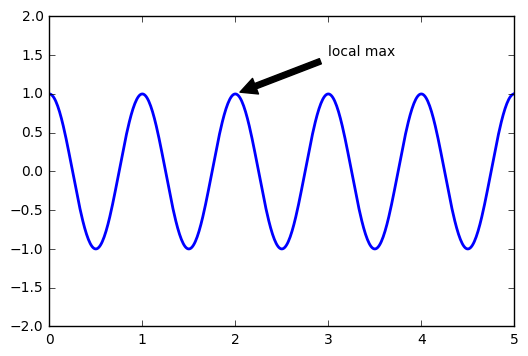

In [36]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)

Dans cet exemple de base, les positions xy (pointe de flèche) et xytext (emplacement de texte) sont dans les coordonnées de données. Il existe une variété d'autres systèmes de coordonnées que l'on peut choisir.

## Echelle logarithmique et autres axes non linéaires

Matplotlib.pyplot supporte non seulement les échelles linéaires, mais aussi les échelles logarithmiques et logiques. Ceci est communément utilisé si les données couvrent de nombreux ordres de grandeur. Changer l'échelle d'un axe est facile: Plt.xscale ('log')

Un exemple de quatre parcelles avec les mêmes données et différentes échelles pour l'axe y est illustré ci-dessous.

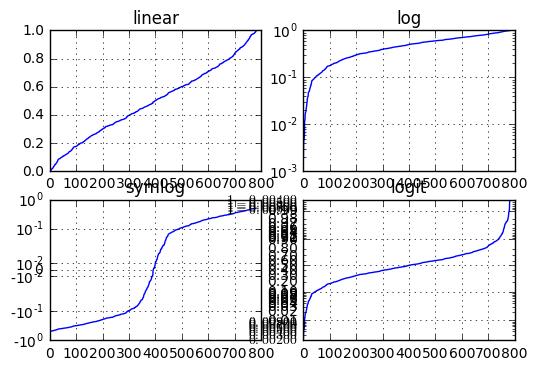

In [37]:
import numpy as np
import matplotlib.pyplot as plt


y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))


plt.figure(1)


plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)



plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)



plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)


plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.show()